In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
boston = load_boston()

In [3]:
X = boston.data
y = boston.target

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

In [5]:
ransac = RANSACRegressor(LinearRegression(),
                        max_trials=100,
                        min_samples=50,
                        loss='absolute_loss',
                        random_state=2021)

In [6]:
ransac.fit(x_train, y_train)

RANSACRegressor(base_estimator=LinearRegression(), min_samples=50,
                random_state=2021)

In [7]:
ransac_pred = ransac.predict(x_test)

In [8]:
print("R2 = {:.2}".format(r2_score(y_test, ransac_pred)))

R2 = 0.64


In [9]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['Price'] = boston.target

In [10]:
X_ = df['RM'].values
y_ = df['Price'].values

In [11]:
X_ = X_[:, np.newaxis]
y_ = y_[:, np.newaxis]

In [12]:
ransac2 = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=50,
                         loss='absolute_loss',
                         random_state=2021)

In [13]:
ransac2.fit(X_, y_)

RANSACRegressor(base_estimator=LinearRegression(), min_samples=50,
                random_state=2021)

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(X_, y_)

LinearRegression()

In [16]:
x_values = np.arange(3,10, 1)

In [17]:
y_ransac = ransac2.predict(x_values[:,np.newaxis])

In [18]:
y_lr = lr.predict(x_values[:,np.newaxis])

In [19]:
inlier_mask = ransac2.inlier_mask_

In [21]:
outlier_mask = np.logical_not(inlier_mask)

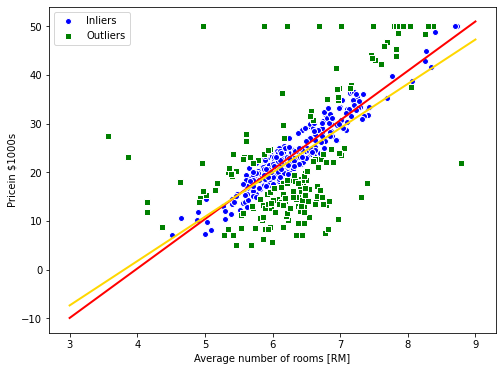

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(X_[inlier_mask], y_[inlier_mask], c='blue', edgecolor='white', marker='o', label='Inliers')
plt.scatter(X_[outlier_mask], y_[outlier_mask], c='green', edgecolor='white', marker='s', label='Outliers')
plt.plot(x_values, y_ransac, color='red', lw=2)
plt.plot(x_values, y_lr, color='gold', lw=2)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Pricein $1000s')
plt.legend(loc='best')
plt.show()

In [26]:
print('Slope: %.3f' % ransac2.estimator_.coef_[0])

Slope: 10.150


In [27]:
print('Intercept: %.3f' % ransac2.estimator_.intercept_)

Intercept: -40.390


In [28]:
y_ransac_pred = ransac2.predict(X_[inlier_mask])

In [29]:
print("R2 = {:.2}".format(r2_score(y_[inlier_mask],y_ransac_pred)))

R2 = 0.9
